<a href="https://colab.research.google.com/github/shubhrojitmisra/Speech-Signal-Processing-for-ML/blob/master/Extracting_Speech_Spectrograms_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Loading audio files
!wget -O male_audio https://www.signalogic.com/melp/EngSamples/Orig/male.wav
!wget -O female_audio https://www.signalogic.com/melp/EngSamples/Orig/female.wav

--2022-04-01 15:14:10--  https://www.signalogic.com/melp/EngSamples/Orig/male.wav
Resolving www.signalogic.com (www.signalogic.com)... 209.150.126.178
Connecting to www.signalogic.com (www.signalogic.com)|209.150.126.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 816496 (797K) [audio/x-wav]
Saving to: ‘male_audio’

male_audio          100%[===================>] 797.36K  --.-KB/s    in 0.02s   

2022-04-01 15:14:10 (32.9 MB/s) - ‘male_audio’ saved [816496/816496]

--2022-04-01 15:14:10--  https://www.signalogic.com/melp/EngSamples/Orig/female.wav
Resolving www.signalogic.com (www.signalogic.com)... 209.150.126.178
Connecting to www.signalogic.com (www.signalogic.com)|209.150.126.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 786740 (768K) [audio/x-wav]
Saving to: ‘female_audio’

female_audio        100%[===================>] 768.30K  --.-KB/s    in 0.04s   

2022-04-01 15:14:10 (18.7 MB/s) - ‘female_audio’ saved [786740/78674

In [ ]:
male_audio = '/content/male_audio'
ipd.Audio(male_audio)

In [ ]:
female_audio = '/content/female_audio'
ipd.Audio(female_audio)

In [ ]:
#Loading the files with Librosa
male, sr = librosa.load(male_audio)
female, sr = librosa.load(female_audio)

In [ ]:
#Extracting STFT
FRAME_SIZE = 2048
HOP_SIZE = 512
S_male = librosa.stft(male, n_fft = FRAME_SIZE, hop_length = HOP_SIZE)
S_male.shape

(1025, 2198)

In [ ]:
type(S_male[0][0])

numpy.complex64

In [ ]:
#Calculating the Spectrogram
Y_male = np.abs(S_male) ** 2
Y_male.shape

(1025, 2198)

In [ ]:
type(Y_male[0][0])

numpy.float32

In [ ]:
#Visualizing the Spectrogram
def plot_spectrogram(Y, sr, hop_length, y_axis = "linear"):
    plt.figure(figsize = (25, 10))
    librosa.display.specshow(Y, 
                             sr = sr, 
                             hop_length = hop_length, 
                             x_axis = "time", 
                             y_axis = y_axis)
    plt.colorbar(format = "%+2.f")

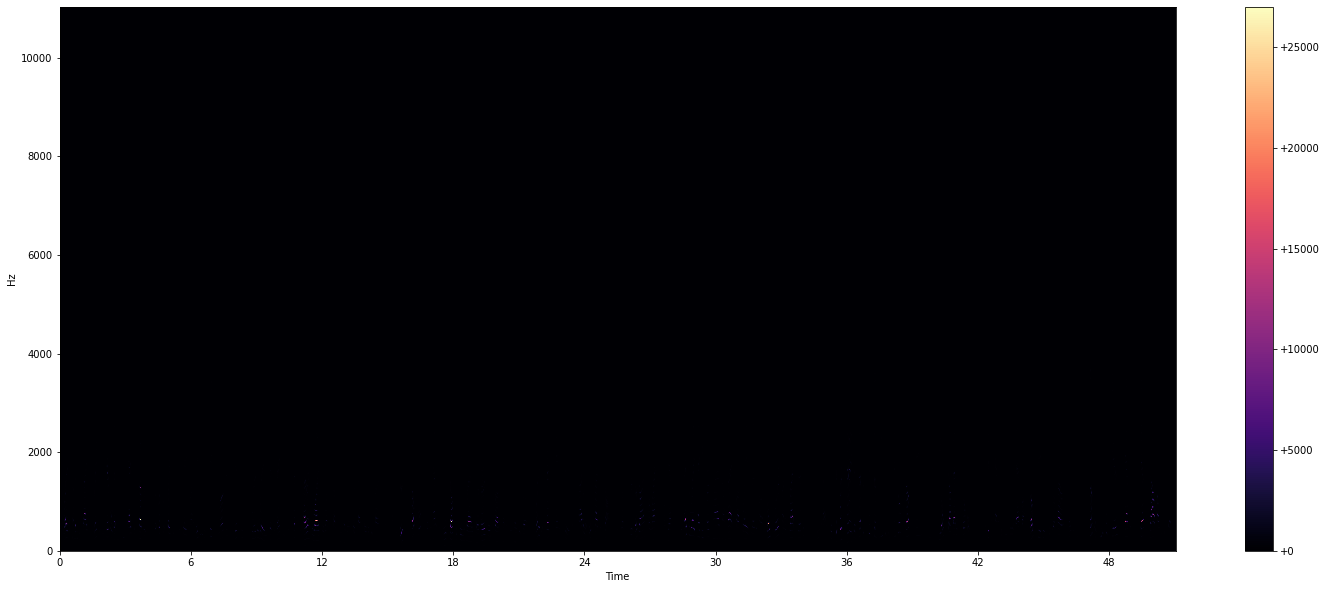

In [ ]:
plot_spectrogram(Y_male, sr, HOP_SIZE)

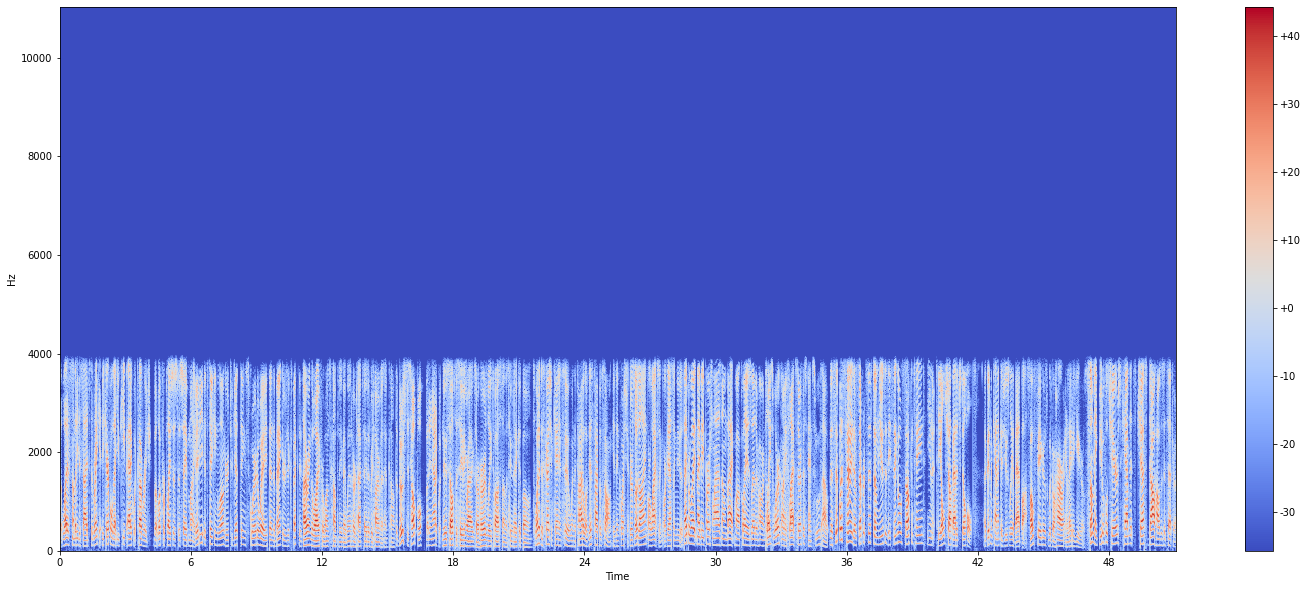

In [ ]:
#Log-Amplitude Spectrogram
Y_log_male = librosa.power_to_db(Y_male)
plot_spectrogram(Y_log_male, sr, HOP_SIZE)

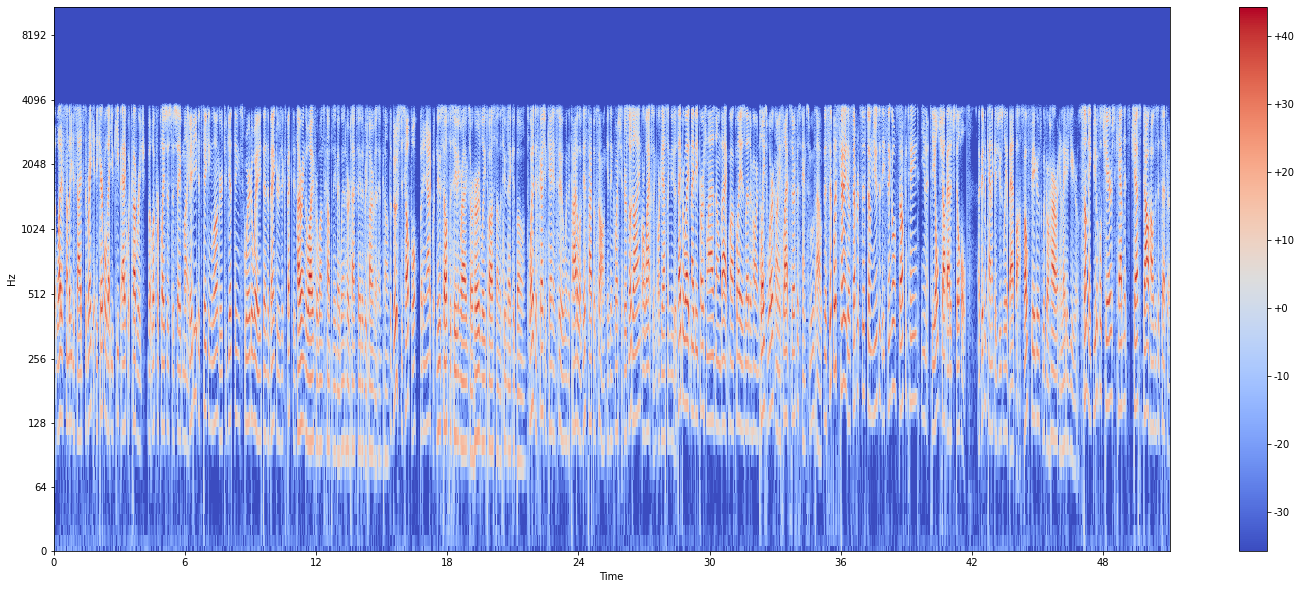

In [ ]:
#Log-Frequency Spectrogram
plot_spectrogram(Y_log_male, sr, HOP_SIZE, y_axis = "log")

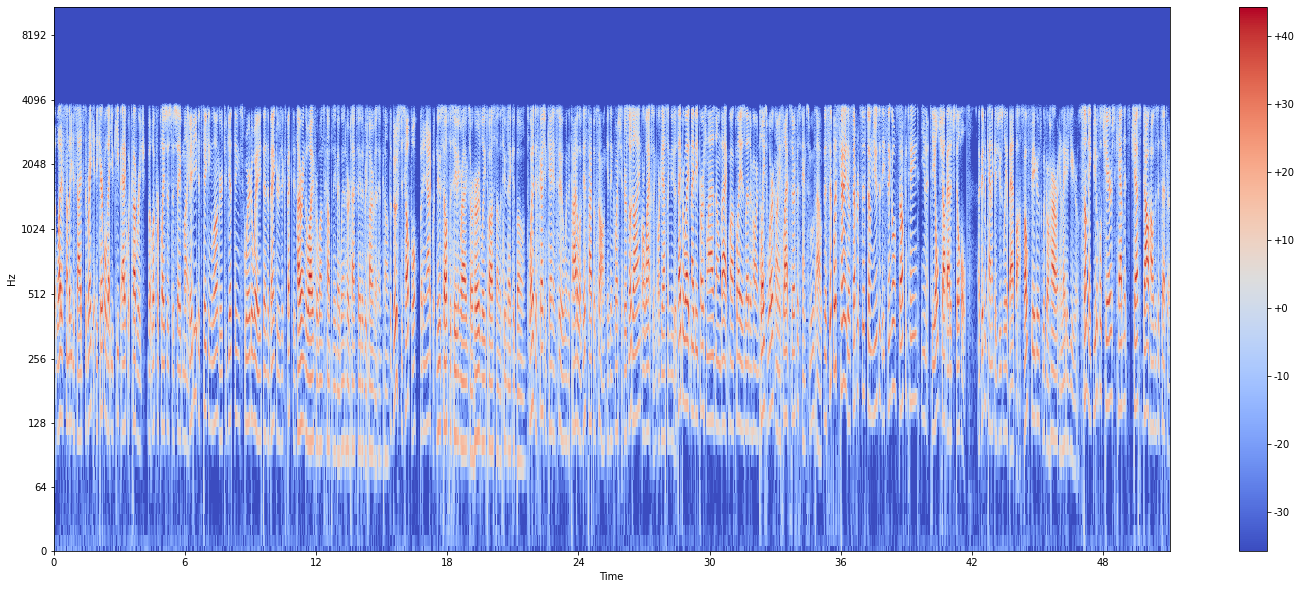

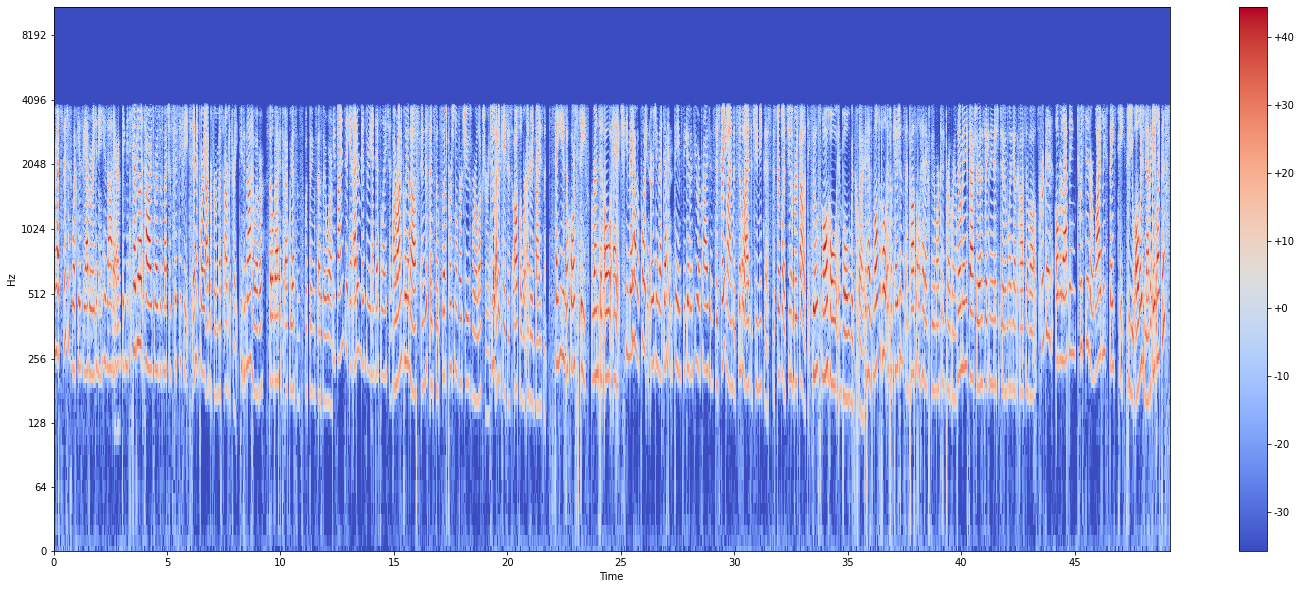

In [ ]:
#Visualising speeches of different genres
S_male = librosa.stft(male, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_female = librosa.stft(female, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

Y_male = librosa.power_to_db(np.abs(S_male) ** 2)
Y_female = librosa.power_to_db(np.abs(S_female) ** 2)

plot_spectrogram(Y_male, sr, HOP_SIZE, y_axis="log")
plot_spectrogram(Y_female, sr, HOP_SIZE, y_axis="log")